In [32]:
import cv2o
import numpy as np
import matplotlib.pyplot as plt

In [67]:
yolo = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
#dnn = deep neural network
#read network

In [68]:
classes = []
with open("coco.names", 'r') as f:
    classes = f.read().splitlines()
    

In [81]:
len(classes)

80

In [82]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [83]:
img = cv2.imread("car.jpg")
#new image in rgb fomat
blob = cv2.dnn.blobFromImage(img, 1/255, (320, 320), (0, 0, 0), swapRB=True, crop=False)
#image 1000* 1000 - algo cannot read it so we resize it, so we reshape it to 320,320
#swapRB = chane bgr to rgb 


In [70]:
#setting blob as input image
yolo.setInput(blob)
output_layer_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_name)

In [84]:
blob.shape

(1, 3, 320, 320)

In [87]:
boxes = []
confidences = []
class_ids = []

height, width, _ = img.shape

for output in layeroutput:
    for detection in output:
        score = detection[5:]#excluding 1st 5 boxes for confidence of each class
        #we are going to get the placeholder in the array where three is maximum probability of that image        
        class_id = np.argmax(score)
        confidence = score[class_id]
        #inorder to prevent multiple bounding boxes we'll have confidence
        if confidence > 0.7:
            #than we'll extract all the featuers
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            #now to find center value of x
            # we are using x and y here to find corenr values
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
# Non-Maximum Suppression (NMS)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

In [89]:
# Convert indexes to a NumPy array before using flatten()
indexes = np.array(indexes)

for i in indexes.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]
    print(f"Label:{label},Confidence:{confi}")
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 3)
    cv2.putText(img, label + " " + confi, (x, y + 20), font, 2, (0,  0,255), 3)



Label:car,Confidence:1.0
Label:bicycle,Confidence:0.99
Label:person,Confidence:0.99
Label:person,Confidence:0.99
Label:car,Confidence:0.99
Label:car,Confidence:0.99
Label:car,Confidence:0.98
Label:bus,Confidence:0.97
Label:person,Confidence:0.95
Label:car,Confidence:0.87


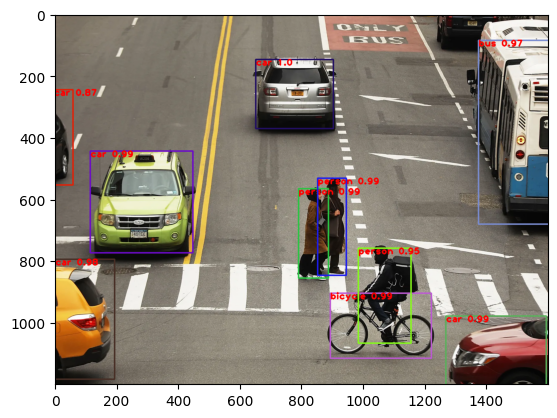

In [90]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()